<a href="https://colab.research.google.com/github/Himangi-77/excelR-assignments/blob/main/ASSIGNMENT14_DECISIONTREE_FRAUDCHECK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

In [65]:
fraud_check = pd.read_csv('/content/Fraud_check.csv')
fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [66]:
fraud_check = pd.get_dummies(fraud_check, columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [67]:
fraud_check.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [68]:
fraud_check['Tax_Inc'] = fraud_check['Taxable.Income'].apply(lambda x: "Risky" if(x<=30000) else "Good")

In [69]:
fraud_check.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_Inc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


In [70]:
#1 for risky and 0 for Good
fraud_check = pd.get_dummies(fraud_check, columns=['Tax_Inc'], drop_first = True)
fraud_check.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_Inc_Risky
0,68833,50047,10,0,0,1,1,0
1,33700,134075,18,1,0,0,1,0
2,36925,160205,30,0,1,0,1,0
3,50190,193264,15,1,0,1,1,0
4,81002,27533,28,0,1,0,0,0


In [71]:
x = fraud_check.drop(['Taxable.Income','Tax_Inc_Risky'], axis=1)
y = fraud_check['Tax_Inc_Risky']

In [72]:
x.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0


In [73]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Tax_Inc_Risky, dtype: uint8

In [74]:
y.value_counts()

0    476
1    124
Name: Tax_Inc_Risky, dtype: int64

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

Building Decision Tree Classifier Using Entropy Criteria

In [76]:
model = DecisionTreeClassifier(criterion='entropy',max_depth = 4)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.5875, 0.9, 'X[3] <= 0.5\nentropy = 0.73\nsamples = 480\nvalue = [382, 98]'),
 Text(0.325, 0.7, 'X[1] <= 29.5\nentropy = 0.679\nsamples = 334\nvalue = [274, 60]'),
 Text(0.2, 0.5, 'X[1] <= 23.5\nentropy = 0.66\nsamples = 322\nvalue = [267, 55]'),
 Text(0.1, 0.3, 'X[0] <= 39426.0\nentropy = 0.714\nsamples = 255\nvalue = [205, 50]'),
 Text(0.05, 0.1, 'entropy = 0.949\nsamples = 19\nvalue = [12, 7]'),
 Text(0.15, 0.1, 'entropy = 0.685\nsamples = 236\nvalue = [193, 43]'),
 Text(0.3, 0.3, 'X[1] <= 27.5\nentropy = 0.383\nsamples = 67\nvalue = [62, 5]'),
 Text(0.25, 0.1, 'entropy = 0.172\nsamples = 39\nvalue = [38, 1]'),
 Text(0.35, 0.1, 'entropy = 0.592\nsamples = 28\nvalue = [24, 4]'),
 Text(0.45, 0.5, 'X[0] <= 59728.5\nentropy = 0.98\nsamples = 12\nvalue = [7, 5]'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5, 0.3, 'X[4] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(0.45, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.55, 0.1

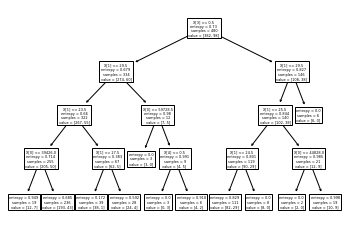

In [77]:
#Plot the Decision Tree
tree.plot_tree(model)

In [78]:
fraud_check.columns

Index(['Taxable.Income', 'City.Population', 'Work.Experience', 'Undergrad_YES',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES',
       'Tax_Inc_Risky'],
      dtype='object')

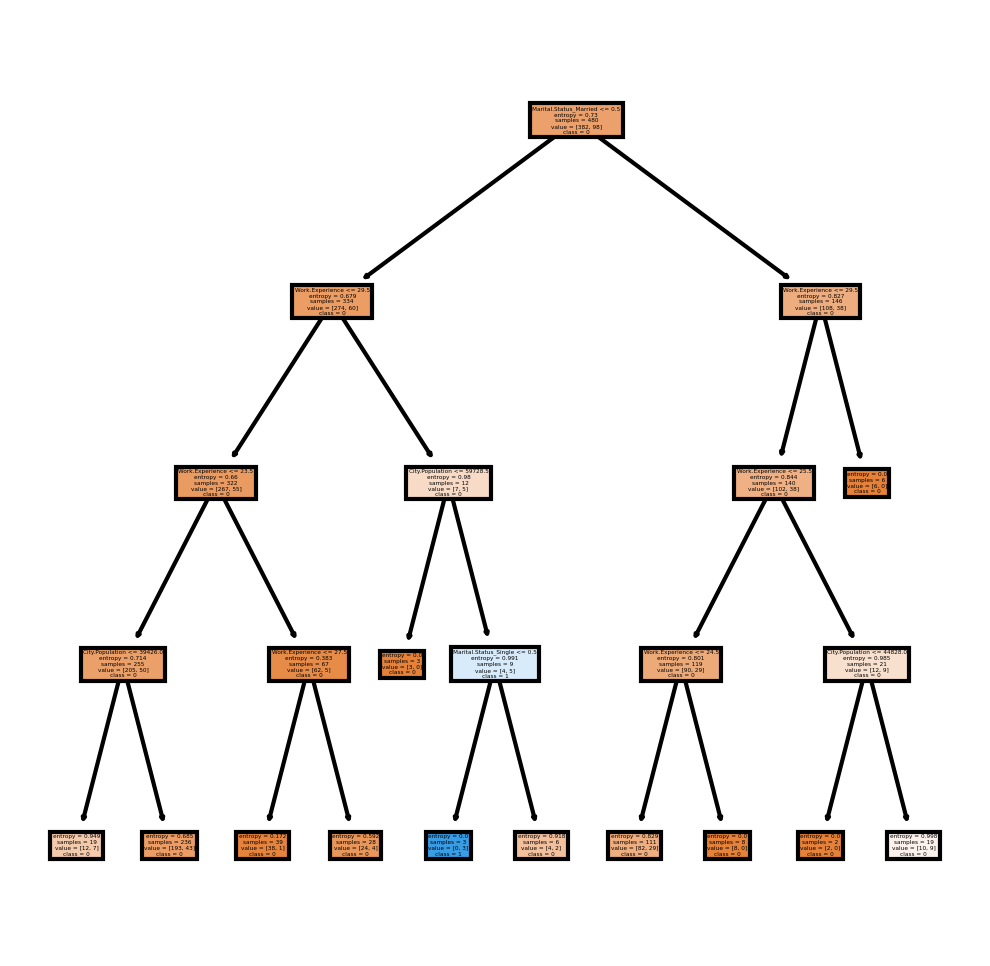

In [79]:
fn = ['City.Population', 'Work.Experience', 'Undergrad_YES',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES',]
cn = ['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [80]:
#Predicting on testing data
y_pred = model.predict(x_test)

In [81]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [82]:
pd.Series(y_pred).value_counts()

0    119
1      1
dtype: int64

In [83]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Tax_Inc_Risky,,
0,93,1
1,26,0


In [84]:
# Accuracy 
np.mean(y_pred==y_test)

0.775

BUILDING DECISION TREE CLASSIFIER (CART) USING GINI CRITERIA

In [85]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [86]:
y_pred1 = model_gini.predict(x_test)

In [87]:
pd.crosstab(y_test,y_pred1)

col_0,0,1
Tax_Inc_Risky,,
0,92,2
1,25,1


In [88]:
#Accuracy
np.mean(y_pred==y_test)

0.775

DECISION TREE REGRESSION

In [89]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,test_size = 0.33, random_state =1)
model_r = DecisionTreeRegressor()

In [91]:
model_r.fit(x_train1,y_train1)

DecisionTreeRegressor()

In [92]:
#Find the accuracy
model.score(x_test1,y_test1)

0.797979797979798